# Non Deep Learning


To  explain non Deep Learning one must first know what Deep Learning is. Deep Learning models are models that learn 'autonomously'. This is possible thanks to the way they are built and programmed. 

Non Deep Learning models therefore describe the models where you have to make the adjustments yourself. Non Deep Learning models are less complex in their structure and are simpler than the Deep Learning models.

Non Deep Learning models have certain characteristics which distinguish them from Deep Learning models. One would be the simpler architecture of the models and their simpler structure. The second would be that in non Deep Learning models feature engineering plays a big role in how they perform. In general, the simpler models like Logistic Regression, Decision Tree or Random Forest are non Deep Learning models.

In this file we will use the two non Deep Learning models Random Forest and Support Vector Machines.

In [67]:
#Import libraries

import json
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import time

pd.set_option('display.max_columns', None) 

## 1. Data reading

All groups that were created in the preprocessing of the data were read in.

For all read-in data a short comment describing the group was entered. A detailed documentation about the groups and the preprocessing of the data can be found in the file 2_data_preprocessing. 

In [6]:
# group 1 - 4: train and test set have different users
# group 1: 400 time steps per window, without overlap
train_X1 = torch.load('../Daten/group_1/train_X.pt').float()
test_X1 = torch.load('../Daten/group_1/test_X.pt').float()
train_y1 = torch.load('../Daten/group_1/train_y.pt').long()
test_y1 = torch.load('../Daten/group_1/test_y.pt').long()

# group 2: 400 time steps per window, with 50% overlap
train_X2 = torch.load('../Daten/group_2/train_X.pt').float()
test_X2 = torch.load('../Daten/group_2/test_X.pt').float()
train_y2 = torch.load('../Daten/group_2/train_y.pt').long()
test_y2 = torch.load('../Daten/group_2/test_y.pt').long()

# group 3: 200 time steps per window, without overlap
train_X3 = torch.load('../Daten/group_3/train_X.pt').float()
test_X3 = torch.load('../Daten/group_3/test_X.pt').float()
train_y3 = torch.load('../Daten/group_3/train_y.pt').long()
test_y3 = torch.load('../Daten/group_3/test_y.pt').long()

# group 4: 200 time steps per window, with 50% overlap
train_X4 = torch.load('../Daten/group_4/train_X.pt').float()
test_X4 = torch.load('../Daten/group_4/test_X.pt').float()
train_y4 = torch.load('../Daten/group_4/train_y.pt').long()
test_y4 = torch.load('../Daten/group_4/test_y.pt').long()

# group 5 - 8: train and test set have same users
# group 5: 400 time steps per window, without overlap
train_X5 = torch.load('../Daten/group_5/train_X.pt').float()
test_X5 = torch.load('../Daten/group_5/test_X.pt').float()
train_y5 = torch.load('../Daten/group_5/train_y.pt').long()
test_y5 = torch.load('../Daten/group_5/test_y.pt').long()

# group 6: 400 time steps per window, with 50% overlap
train_X6 = torch.load('../Daten/group_6/train_X.pt').float()
test_X6 = torch.load('../Daten/group_6/test_X.pt').float()
train_y6 = torch.load('../Daten/group_6/train_y.pt').long()
test_y6 = torch.load('../Daten/group_6/test_y.pt').long()

# group 7: 200 time steps per window, without overlap
train_X7 = torch.load('../Daten/group_7/train_X.pt').float()
test_X7 = torch.load('../Daten/group_7/test_X.pt').float()
train_y7 = torch.load('../Daten/group_7/train_y.pt').long()
test_y7 = torch.load('../Daten/group_7/test_y.pt').long()

# group 8: 200 time steps per window, with 50% overlap
train_X8 = torch.load('../Daten/group_8/train_X.pt').float()
test_X8 = torch.load('../Daten/group_8/test_X.pt').float()
train_y8 = torch.load('../Daten/group_8/train_y.pt').long()
test_y8 = torch.load('../Daten/group_8/test_y.pt').long()

# group 9 - 12: train and test set have different users with maximal window size
# group 9: 400 time steps per window, without overlap
train_X9 = torch.load('../Daten/group_9/train_X.pt').float()
test_X9 = torch.load('../Daten/group_9/test_X.pt').float()
train_y9 = torch.load('../Daten/group_9/train_y.pt').long()
test_y9 = torch.load('../Daten/group_9/test_y.pt').long()

# group 10: 400 time steps per window, with 50% overlap
train_X10 = torch.load('../Daten/group_10/train_X.pt').float()
test_X10 = torch.load('../Daten/group_10/test_X.pt').float()
train_y10 = torch.load('../Daten/group_10/train_y.pt').long()
test_y10 = torch.load('../Daten/group_10/test_y.pt').long()

# group 11: 200 time steps per window, without overlap
train_X11 = torch.load('../Daten/group_11/train_X.pt').float()
test_X11 = torch.load('../Daten/group_11/test_X.pt').float()
train_y11 = torch.load('../Daten/group_11/train_y.pt').long()
test_y11 = torch.load('../Daten/group_11/test_y.pt').long()

# group 12: 200 time steps per window, with 50% overlap
train_X12 = torch.load('../Daten/group_12/train_X.pt').float()
test_X12 = torch.load('../Daten/group_12/test_X.pt').float()
train_y12 = torch.load('../Daten/group_12/train_y.pt').long()
test_y12 = torch.load('../Daten/group_12/test_y.pt').long()

# group 13 - 16: train and test set have same users with maximal window size
# group 13: 400 time steps per window, without overlap
train_X13 = torch.load('../Daten/group_13/train_X.pt').float()
test_X13 = torch.load('../Daten/group_13/test_X.pt').float()
train_y13 = torch.load('../Daten/group_13/train_y.pt').long()
test_y13 = torch.load('../Daten/group_13/test_y.pt').long()

# group 14: 400 time steps per window, with 50% overlap
train_X14 = torch.load('../Daten/group_14/train_X.pt').float()
test_X14 = torch.load('../Daten/group_14/test_X.pt').float()
train_y14 = torch.load('../Daten/group_14/train_y.pt').long()
test_y14 = torch.load('../Daten/group_14/test_y.pt').long()

# group 15: 200 time steps per window, without overlap
train_X15 = torch.load('../Daten/group_15/train_X.pt').float()
test_X15 = torch.load('../Daten/group_15/test_X.pt').float()
train_y15 = torch.load('../Daten/group_15/train_y.pt').long()
test_y15 = torch.load('../Daten/group_15/test_y.pt').long()

# group 16: 200 time steps per window, with 50% overlap
train_X16 = torch.load('../Daten/group_16/train_X.pt').float()
test_X16 = torch.load('../Daten/group_16/test_X.pt').float()
train_y16 = torch.load('../Daten/group_16/train_y.pt').long()
test_y16 = torch.load('../Daten/group_16/test_y.pt').long()

# group 17-18: 6 users in trainset, the seven-th user in testset  
# group 17: 200 time steps per window, with 50% overlap with 16 windows per record
train_X17 = torch.load('../Daten/group_17/train_X.pt').float()
test_X17 = torch.load('../Daten/group_17/test_X.pt').float()
train_y17 = torch.load('../Daten/group_17/train_y.pt').long()
test_y17 = torch.load('../Daten/group_17/test_y.pt').long()

# group 18: 200 time steps per window, with 50% overlap as many windows as possible per record
train_X18 = torch.load('../Daten/group_18/train_X.pt').float()
test_X18 = torch.load('../Daten/group_18/test_X.pt').float()
train_y18 = torch.load('../Daten/group_18/train_y.pt').long()
test_y18 = torch.load('../Daten/group_18/test_y.pt').long()

To transform the data from torch to a numpy array so it can be used for non Deep Learning models the functions get_numpy will be used. And a first feature engeeniring will be done where the mean, standard deviation, min and max values of the variables will be calculated and given back as an numpy array.

In [7]:
def extract_features(data):
    features = []   
    # Compute statistical features
    mean = np.mean(data, axis=1)
    std_dev = np.std(data, axis=1)
    min_value = np.min(data, axis=1)
    max_value = np.max(data, axis=1)
    
    # Combine all features into a single array
    features = np.column_stack((mean, std_dev, min_value, max_value))
    return features

def get_numpy(data, get_total=True):
    data_np = data.double().numpy()
    if len(data_np.shape) >= 2:
        data_np = extract_features(data_np)
        df_data = pd.DataFrame(data_np)
        df_sta = pd.DataFrame()
        calc = df_data.shape[1]+1
        if get_total:
            for i in range(0, df_data.shape[1], 3):
                x = df_data[i]**2
                y = df_data[i+1]**2
                z = df_data[i+2]**2
                df_sta[calc] = np.sqrt(x+y+z)
                calc += 1
            #concatenate the dataframes
            data_np = pd.concat([df_data, df_sta], axis=1)
    return data_np


In the following, all data are converted into numpy arrays and the corresponding feature engineering is applied.

In the function get_numpy() there is the possibility not to calculate the different axes of the sensors together. This is because we want to check if the transformation really supports the model.

In [8]:
X_1_train = get_numpy(train_X1)
X_1_test = get_numpy(test_X1)
y_1_train = get_numpy(train_y1)
y_1_test = get_numpy(test_y1)

X_2_train = get_numpy(train_X2)
X_2_test = get_numpy(test_X2)
y_2_train = get_numpy(train_y2)
y_2_test = get_numpy(test_y2)

X_3_train = get_numpy(train_X3)
X_3_test = get_numpy(test_X3)
y_3_train = get_numpy(train_y3)
y_3_test = get_numpy(test_y3)

X_4_train = get_numpy(train_X4)
X_4_test = get_numpy(test_X4)
y_4_train = get_numpy(train_y4)
y_4_test = get_numpy(test_y4)

X_5_train = get_numpy(train_X5)
X_5_test = get_numpy(test_X5)
y_5_train = get_numpy(train_y5)
y_5_test = get_numpy(test_y5)

X_6_train = get_numpy(train_X6)
X_6_test = get_numpy(test_X6)
y_6_train = get_numpy(train_y6)
y_6_test = get_numpy(test_y6)

X_7_train = get_numpy(train_X7)
X_7_test = get_numpy(test_X7)
y_7_train = get_numpy(train_y7)
y_7_test = get_numpy(test_y7)

X_8_train = get_numpy(train_X8)
X_8_test = get_numpy(test_X8)
y_8_train = get_numpy(train_y8)
y_8_test = get_numpy(test_y8)

X_9_train = get_numpy(train_X9)
X_9_test = get_numpy(test_X9)
y_9_train = get_numpy(train_y9)
y_9_test = get_numpy(test_y9)

X_10_train = get_numpy(train_X10)
X_10_test = get_numpy(test_X10)
y_10_train = get_numpy(train_y10)
y_10_test = get_numpy(test_y10)

X_11_train = get_numpy(train_X11)
X_11_test = get_numpy(test_X11)
y_11_train = get_numpy(train_y11)
y_11_test = get_numpy(test_y11)

X_12_train = get_numpy(train_X12)
X_12_test = get_numpy(test_X12)
y_12_train = get_numpy(train_y12)
y_12_test = get_numpy(test_y12)

X_13_train = get_numpy(train_X13)
X_13_test = get_numpy(test_X13)
y_13_train = get_numpy(train_y13)
y_13_test = get_numpy(test_y13)

X_14_train = get_numpy(train_X14)
X_14_test = get_numpy(test_X14)
y_14_train = get_numpy(train_y14)
y_14_test = get_numpy(test_y14)

X_15_train = get_numpy(train_X15)
X_15_test = get_numpy(test_X15)
y_15_train = get_numpy(train_y15)
y_15_test = get_numpy(test_y15)

X_16_train = get_numpy(train_X16)
X_16_test = get_numpy(test_X16)
y_16_train = get_numpy(train_y16)
y_16_test = get_numpy(test_y16)

X_17_train = get_numpy(train_X17)
X_17_test = get_numpy(test_X17)
y_17_train = get_numpy(train_y17)
y_17_test = get_numpy(test_y17)

X_18_train = get_numpy(train_X18)
X_18_test = get_numpy(test_X18)
y_18_train = get_numpy(train_y18)
y_18_test = get_numpy(test_y18)

In [31]:
#read all groups as numpy with get_numpy but without total
X_1_train_false = get_numpy(train_X1, get_total=False)
X_1_test_false = get_numpy(test_X1, get_total=False)
y_1_train_false = get_numpy(train_y1, get_total=False)
y_1_test_false = get_numpy(test_y1, get_total=False)

X_2_train_false = get_numpy(train_X2, get_total=False)
X_2_test_false = get_numpy(test_X2, get_total=False)
y_2_train_false = get_numpy(train_y2, get_total=False)
y_2_test_false = get_numpy(test_y2, get_total=False)

X_3_train_false = get_numpy(train_X3, get_total=False)
X_3_test_false = get_numpy(test_X3, get_total=False)
y_3_train_false = get_numpy(train_y3, get_total=False)
y_3_test_false = get_numpy(test_y3, get_total=False)

X_4_train_false = get_numpy(train_X4, get_total=False)
X_4_test_false = get_numpy(test_X4, get_total=False)
y_4_train_false = get_numpy(train_y4, get_total=False)
y_4_test_false = get_numpy(test_y4, get_total=False)

X_5_train_false = get_numpy(train_X5, get_total=False)
X_5_test_false = get_numpy(test_X5, get_total=False)
y_5_train_false = get_numpy(train_y5, get_total=False)
y_5_test_false = get_numpy(test_y5, get_total=False)

X_6_train_false = get_numpy(train_X6, get_total=False)
X_6_test_false = get_numpy(test_X6, get_total=False)
y_6_train_false = get_numpy(train_y6, get_total=False)
y_6_test_false = get_numpy(test_y6, get_total=False)

X_7_train_false = get_numpy(train_X7, get_total=False)
X_7_test_false = get_numpy(test_X7, get_total=False)
y_7_train_false = get_numpy(train_y7, get_total=False)
y_7_test_false = get_numpy(test_y7, get_total=False)

X_8_train_false = get_numpy(train_X8, get_total=False)
X_8_test_false = get_numpy(test_X8, get_total=False)
y_8_train_false = get_numpy(train_y8, get_total=False)
y_8_test_false = get_numpy(test_y8, get_total=False)

X_9_train_false = get_numpy(train_X9, get_total=False)
X_9_test_false = get_numpy(test_X9, get_total=False)
y_9_train_false = get_numpy(train_y9, get_total=False)
y_9_test_false = get_numpy(test_y9, get_total=False)

X_10_train_false = get_numpy(train_X10, get_total=False)
X_10_test_false = get_numpy(test_X10, get_total=False)
y_10_train_false = get_numpy(train_y10, get_total=False)
y_10_test_false = get_numpy(test_y10, get_total=False)

X_11_train_false = get_numpy(train_X11, get_total=False)
X_11_test_false = get_numpy(test_X11, get_total=False)
y_11_train_false = get_numpy(train_y11, get_total=False)
y_11_test_false = get_numpy(test_y11, get_total=False)

X_12_train_false = get_numpy(train_X12, get_total=False)
X_12_test_false = get_numpy(test_X12, get_total=False)
y_12_train_false = get_numpy(train_y12, get_total=False)
y_12_test_false = get_numpy(test_y12, get_total=False)

X_13_train_false = get_numpy(train_X13, get_total=False)
X_13_test_false = get_numpy(test_X13, get_total=False)
y_13_train_false = get_numpy(train_y13, get_total=False)
y_13_test_false = get_numpy(test_y13, get_total=False)

X_14_train_false = get_numpy(train_X14, get_total=False)
X_14_test_false = get_numpy(test_X14, get_total=False)
y_14_train_false = get_numpy(train_y14, get_total=False)
y_14_test_false = get_numpy(test_y14, get_total=False)

X_15_train_false = get_numpy(train_X15, get_total=False)
X_15_test_false = get_numpy(test_X15, get_total=False)
y_15_train_false = get_numpy(train_y15, get_total=False)
y_15_test_false = get_numpy(test_y15, get_total=False)

X_16_train_false = get_numpy(train_X16, get_total=False)
X_16_test_false = get_numpy(test_X16, get_total=False)
y_16_train_false = get_numpy(train_y16, get_total=False)
y_16_test_false = get_numpy(test_y16, get_total=False)

X_17_train_false = get_numpy(train_X17, get_total=False)
X_17_test_false = get_numpy(test_X17, get_total=False)
y_17_train_false = get_numpy(train_y17, get_total=False)
y_17_test_false = get_numpy(test_y17, get_total=False)

X_18_train_false = get_numpy(train_X18, get_total=False)
X_18_test_false = get_numpy(test_X18, get_total=False)
y_18_train_false = get_numpy(train_y18, get_total=False)
y_18_test_false = get_numpy(test_y18, get_total=False)

In [97]:
print("Shape of X_1_train", X_1_train.shape)
print("Shape of X_1_train_false", X_1_train_false.shape)

Shape of X_1_train (744, 64)
Shape of X_1_train_false (744, 48)


After the data has been converted into a numpy array and the appropriate transformations have been performed. All related train and test sets are stored in a list which is used for applying the models.

In [45]:
all_features = [[X_1_train, X_1_test, y_1_train, y_1_test], [X_2_train, X_2_test, y_2_train, y_2_test], [X_3_train, X_3_test, y_3_train, y_3_test], 
                [X_4_train, X_4_test, y_4_train, y_4_test], [X_5_train, X_5_test, y_5_train, y_5_test], [X_6_train, X_6_test, y_6_train, y_6_test], 
                [X_7_train, X_7_test, y_7_train, y_7_test], [X_8_train, X_8_test, y_8_train, y_8_test], [X_9_train, X_9_test, y_9_train, y_9_test], 
                [X_10_train, X_10_test, y_10_train, y_10_test], [X_11_train, X_11_test, y_11_train, y_11_test], 
                [X_12_train, X_12_test, y_12_train, y_12_test], [X_13_train, X_13_test, y_13_train, y_13_test], 
                [X_14_train, X_14_test, y_14_train, y_14_test], [X_15_train, X_15_test, y_15_train, y_15_test], 
                [X_16_train, X_16_test, y_16_train, y_16_test], [X_17_train, X_17_test, y_17_train, y_17_test], 
                [X_18_train, X_18_test, y_18_train, y_18_test]]
not_all_features = [[X_1_train_false, X_1_test_false, y_1_train_false, y_1_test_false], [X_2_train_false, X_2_test_false, y_2_train_false, y_2_test_false], 
                    [X_3_train_false, X_3_test_false, y_3_train_false, y_3_test_false], [X_4_train_false, X_4_test_false, y_4_train_false, y_4_test_false], 
                    [X_5_train_false, X_5_test_false, y_5_train_false, y_5_test_false], [X_6_train_false, X_6_test_false, y_6_train_false, y_6_test_false], 
                    [X_7_train_false, X_7_test_false, y_7_train_false, y_7_test_false], [X_8_train_false, X_8_test_false, y_8_train_false, y_8_test_false], 
                    [X_9_train_false, X_9_test_false, y_9_train_false, y_9_test_false], [X_10_train_false, X_10_test_false, y_10_train_false, y_10_test_false], 
                    [X_11_train_false, X_11_test_false, y_11_train_false, y_11_test_false], [X_12_train_false, X_12_test_false, y_12_train_false, y_12_test_false], 
                    [X_13_train_false, X_13_test_false, y_13_train_false, y_13_test_false], [X_14_train_false, X_14_test_false, y_14_train_false, y_14_test_false], 
                    [X_15_train_false, X_15_test_false, y_15_train_false, y_15_test_false], [X_16_train_false, X_16_test_false, y_16_train_false, y_16_test_false], 
                    [X_17_train_false, X_17_test_false, y_17_train_false, y_17_test_false], [X_18_train_false, X_18_test_false, y_18_train_false, y_18_test_false]]

In [66]:
print("Shape of X_1_train from list", all_features[0][0].shape)
print("Shape of X_1_train_false from list", not_all_features[0][0].shape)


Shape of X_1_train from list (744, 64)
Shape of X_1_train_false from list (744, 48)


The shapes of these two records were output to check if they were stored correctly in the list.

## 2. Random Forest Classifier


Random Forest combines several decision trees and makes the decision based on them.

To explain this in more detail, we will take a closer look at the Random Forest Classifier.

As already mentioned, this consists of several decision trees. In each of these decision trees, random features are given to split the nodes. By this precondition the model tries to prevent overfitting by not considering any feature as more important for the decision. 

The classification made by the Random Forest in our case is decided as follows. Each decision tree is trained, after all decision trees are trained, each decision tree in the random forest will make a prediction. The model then takes the prediction that occurred the most often.

### 2.1 Check of Datasets

To check which datasets perform better on a default model, a function is written that returns the average of the accuracy of all trained and tested data. 

Afterwards the mean values are compared and the dataset which performs better is taken.

In [57]:
rdf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=42)

def check_accuracy(features):
    '''
    This function takes in a list of features and returns the mean accuracy of the training and test sets
        
    '''
    accuracy_test = []
    accuracy_train = []
    for feature in features:
        rdf.fit(feature[0], feature[2])
        pred_train = rdf.predict(feature[0])
        pred_test = rdf.predict(feature[1])
        accuracy_train.append(accuracy_score(feature[2], pred_train))
        accuracy_test.append(accuracy_score(feature[3], pred_test))
    return np.mean(accuracy_train), np.mean(accuracy_test)

In [62]:
sensors_callculated = check_accuracy(all_features)
sensors_not_callculated = check_accuracy(not_all_features)

In [63]:
print("Train accuracy with axis callculated together for all sensors: ", sensors_callculated[0])
print("Test accuracy with axis callculated together for all sensors: ", sensors_callculated[1])

Train accuracy with axis callculated together for all sensors:  0.834337080803557
Test accuracy with axis callculated together for all sensors:  0.6041597941902777


In [64]:
print("Train accuracy with axis not callculated together for all sensors: ", sensors_not_callculated[0])
print("Test accuracy with axis not callculated together for all sensors: ", sensors_not_callculated[1])

Train accuracy with axis not callculated together for all sensors:  0.8616678883980254
Test accuracy with axis not callculated together for all sensors:  0.6410019917634435


The mean values of the accuracies over all groups show that the model which uses the data which does not calculate the different axes of the sensors together performs better than the model which calculates the axes together.

In [190]:
rdf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=42)
def get_scores(features, model):

    train_accuracy = []
    test_accuracy = []
    group = 1
    for feature in features:
        # Time the training
        start_train = time.time()
        model.fit(feature[0], feature[2])
        end_train = time.time()

        # Make predictions and calculate train accuracy
        y_train_pred = model.predict(feature[0])
        train_accuracy_gr = accuracy_score(feature[2], y_train_pred)
        print("Group ", group)
        print("Train accuracy: {:.2f}%".format(train_accuracy_gr * 100))
        # Make predictions and calculate accuracy
        # Time the testing
        start = time.time()
        y_pred = model.predict(feature[1])
        end = time.time()
        accuracy = accuracy_score(feature[3], y_pred)
        print("Test accuracy: {:.2f}%".format(accuracy * 100))
        print("Time to train: ", np.round((end_train - start_train), 3), "seconds")
        print("Time to test: ", np.round((end - start), 3), "seconds")
        train_accuracy.append(train_accuracy_gr)
        test_accuracy.append(accuracy)
        group += 1
    return train_accuracy, test_accuracy

In [191]:
train_accuracy, test_accuracy = get_scores(not_all_features, rdf)

Group  1
Train accuracy: 87.63%
Test accuracy: 42.50%
Time to train:  0.188 seconds
Time to test:  0.017 seconds
Group  2
Train accuracy: 90.26%
Test accuracy: 46.00%
Time to train:  0.204 seconds
Time to test:  0.017 seconds
Group  3
Train accuracy: 85.08%
Test accuracy: 45.75%
Time to train:  0.297 seconds
Time to test:  0.016 seconds
Group  4
Train accuracy: 84.11%
Test accuracy: 45.00%
Time to train:  0.37 seconds
Time to test:  0.012 seconds
Group  5
Train accuracy: 82.75%
Test accuracy: 85.42%
Time to train:  0.121 seconds
Time to test:  0.01 seconds
Group  6
Train accuracy: 83.90%
Test accuracy: 77.08%
Time to train:  0.18 seconds
Time to test:  0.016 seconds
Group  7
Train accuracy: 83.41%
Test accuracy: 77.08%
Time to train:  0.178 seconds
Time to test:  0.01 seconds
Group  8
Train accuracy: 80.15%
Test accuracy: 76.04%
Time to train:  0.3 seconds
Time to test:  0.011 seconds
Group  9
Train accuracy: 89.37%
Test accuracy: 34.53%
Time to train:  0.709 seconds
Time to test:  0.0

In [113]:
# Train and test accuracy to dataframe
train_accuracy_table = pd.DataFrame(train_accuracy)
train_accuracy_table.columns = ['Train Accuracy']
train_accuracy_table['group'] = train_accuracy_table.index + 1
test_accuracy_table = pd.DataFrame(test_accuracy)
test_accuracy_table.columns = ['Test Accuracy']
test_accuracy_table['group'] = test_accuracy_table.index + 1

In [117]:
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy_table['group'], train_accuracy_table['Train Accuracy'], label='Train Accuracy')
plt.plot(test_accuracy_table['group'], test_accuracy_table['Test Accuracy'], label='Test Accuracy')
plt.title('Train and Test Accuracy for Random Forest')
plt.xlabel('Group')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 19, step=1))
plt.legend()
plt.grid()
plt.show()

In the plot you can see the test and train accuracy line. You can see that in the groups 5, 15 and 16 the test values exceed the training values, which cannot be. In general, you can see that the groups which are mixed, i.e. contain measurements from a user in the training as well as in the test data, perform better than the groups which define the measurements from a user as a test set. 

Groups 17 and 18 also perform well even though they have an independent user as test set.

### 2.2 GridSearch Random Forest
GridSearch is a technique to find the best parameters for the model to be optimized.

For this purpose, the parameters that you want to optimize are defined beforehand. The defined parameters are entered individually into the model by using the GridSearch. Every possible combination of the defined parameters is fitted. The models are evaluated by using cross validation to evaluate the performance and determined which model and parameter perform best.


A GridSearch is performed on our Random Forest model. For this purpose, group 8 is used, since it has a low train accuracy value in the plot and the difference between the test and train accuracy is not so large.

In [118]:
#Grid Search
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [2, 4, 6, 8, 10],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

grid_search = GridSearchCV(estimator = rdf, param_grid = param_grid,
                            cv = 3, n_jobs = -1, verbose = 2, return_train_score=True, scoring='accuracy')       
grid_search.fit(X_8_train_false, y_8_train_false)
grid_search.best_params_
best_grid = grid_search.best_estimator_

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


The parameters of the gridsearch mean:
- Bootstrap the random forest trains the decision trees on a random subset of the data. With this all decision trees are training on a random subset and can perform better.

- max_depth is the maximum depth of the tree, so the maximum number of nodes of the tree.

- max_features is the maximum number of features that are considered in when a split is done.

- min_sample_leaf the minimum number of samples required to be at a leaf node.

- min_sample_split the minimum number of sample to split an node.

- n_estimators the number of trees in the forest.

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [119]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.best_score_)

{'bootstrap': True, 'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
RandomForestClassifier(max_depth=10, max_features=2, min_samples_leaf=3,
                       min_samples_split=8, random_state=42)
0.9937839937839938


In [185]:
rdf_gd = RandomForestClassifier(bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, random_state=42)
train_accuracy_gd, test_accuracy_gd = get_scores(not_all_features, rdf_gd)

Group  1
Random Forest train accuracy: 99.87%
Random Forest test accuracy: 41.00%
Time to train:  0.194 seconds
Time to test:  0.008 seconds
Group  2
Random Forest train accuracy: 100.00%
Random Forest test accuracy: 43.00%
Time to train:  0.233 seconds
Time to test:  0.01 seconds
Group  3
Random Forest train accuracy: 99.66%
Random Forest test accuracy: 30.50%
Time to train:  0.229 seconds
Time to test:  0.018 seconds
Group  4
Random Forest train accuracy: 99.93%
Random Forest test accuracy: 36.38%
Time to train:  0.39 seconds
Time to test:  0.016 seconds
Group  5
Random Forest train accuracy: 100.00%
Random Forest test accuracy: 99.31%
Time to train:  0.137 seconds
Time to test:  0.016 seconds
Group  6
Random Forest train accuracy: 100.00%
Random Forest test accuracy: 98.26%
Time to train:  0.22 seconds
Time to test:  0.017 seconds
Group  7
Random Forest train accuracy: 100.00%
Random Forest test accuracy: 97.57%
Time to train:  0.234 seconds
Time to test:  0.022 seconds
Group  8
Ran

In [121]:
# Train and test accuracy to dataframe
train_accuracy_table_gd = pd.DataFrame(train_accuracy_gd)
train_accuracy_table_gd.columns = ['Train Accuracy']
train_accuracy_table_gd['group'] = train_accuracy_table_gd.index + 1
test_accuracy_table_gd = pd.DataFrame(test_accuracy_gd)
test_accuracy_table_gd.columns = ['Test Accuracy']
test_accuracy_table_gd['group'] = test_accuracy_table_gd.index + 1

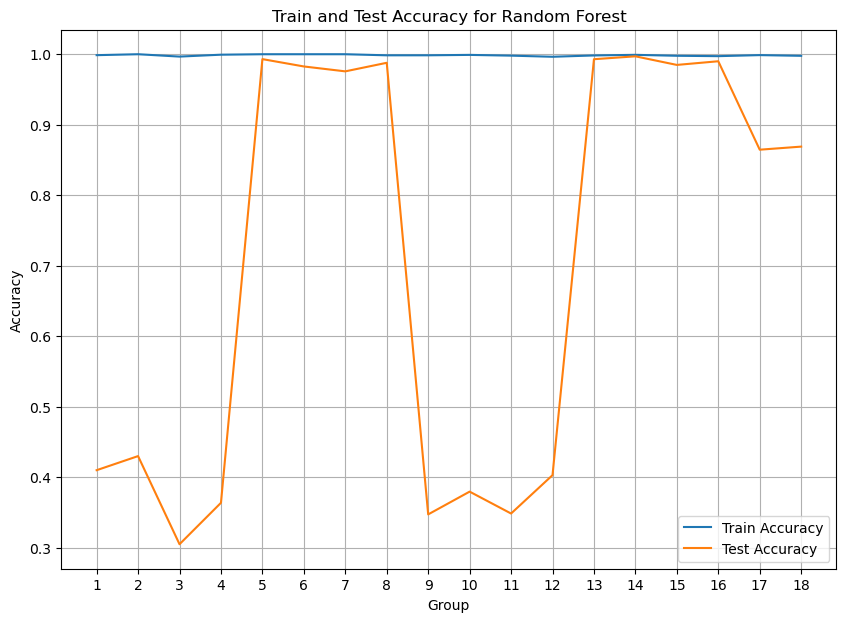

In [122]:
#Plot accuracies and mark the group with smallest difference between train and test accuracy
plt.figure(figsize=(10,7))
plt.plot(train_accuracy_table_gd['group'], train_accuracy_table_gd['Train Accuracy'], label='Train Accuracy')
plt.plot(test_accuracy_table_gd['group'], test_accuracy_table_gd['Test Accuracy'], label='Test Accuracy')
plt.title('Train and Test Accuracy for Random Forest')
plt.xlabel('Group')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 19, step=1))
plt.legend()
plt.grid()
plt.show()

It can be seen that the training data all perform equally well around 99%. The test data looks different again. The groups with the independent test user perform significantly worse than in the training data, there is an overfitting. In the data where the measurements are mixed, it can be seen that they all perform well above 90%. The group with the maximum window size (13-16) even performs almost perfect. 

It is interesting to see that groups 17 and 18 which have an additional user also perform very well by 85% on the training data. 

### 2.3 Testing Random state

The differences between the individual groups that perform well are minimal. But to check if the random_state parameter has an influence on the results will 5 random states will be initialized and plotted.

In [123]:
np.random.seed(42)
#Get 5 random values
random_values = []
for i in range(5):
    random_values.append(np.random.randint(100))
random_values

[51, 92, 14, 71, 60]

In [186]:
count = 1
for rand in random_values:
    rdf_rand = rdf_gd = RandomForestClassifier(bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, random_state=rand)
    train_accuracy_rand, test_accuracy_rand = get_scores(not_all_features, rdf_rand)
    #Get table of accuracies
    #Get dataframe with one row and 10 columns
    if count == 1:
        table_accuracy_rand = pd.DataFrame(train_accuracy_rand)
        table_accuracy_rand.columns = ['Train Accuracy '+str(count)]
        table_accuracy_rand['Test Accuracy '+str(count)] = test_accuracy_rand
        table_accuracy_rand['group'] = table_accuracy_rand.index + 1
        count += 1
    else:
        table_accuracy_rand['Train Accuracy '+str(count)] = train_accuracy_rand
        table_accuracy_rand['Test Accuracy '+str(count)] = test_accuracy_rand

        count += 1

Group  1
Random Forest train accuracy: 99.87%
Random Forest test accuracy: 35.50%
Time to train:  0.166 seconds
Time to test:  0.008 seconds
Group  2
Random Forest train accuracy: 100.00%
Random Forest test accuracy: 33.75%
Time to train:  0.2 seconds
Time to test:  0.008 seconds
Group  3
Random Forest train accuracy: 99.80%
Random Forest test accuracy: 31.25%
Time to train:  0.218 seconds
Time to test:  0.013 seconds
Group  4
Random Forest train accuracy: 99.93%
Random Forest test accuracy: 33.62%
Time to train:  0.434 seconds
Time to test:  0.02 seconds
Group  5
Random Forest train accuracy: 100.00%
Random Forest test accuracy: 99.31%
Time to train:  0.15 seconds
Time to test:  0.008 seconds
Group  6
Random Forest train accuracy: 100.00%
Random Forest test accuracy: 98.26%
Time to train:  0.196 seconds
Time to test:  0.017 seconds
Group  7
Random Forest train accuracy: 99.92%
Random Forest test accuracy: 96.18%
Time to train:  0.198 seconds
Time to test:  0.013 seconds
Group  8
Rando

In [132]:
table_accuracy_rand

Train Accuracy 1  Test Accuracy 1  group  Train Accuracy 2  \
0           0.998656         0.355000      1          0.997312   
1           1.000000         0.337500      2          1.000000   
2           0.997984         0.312500      3          0.995968   
3           0.999328         0.336250      4          0.998992   
4           1.000000         0.993056      5          1.000000   
5           1.000000         0.982639      6          1.000000   
6           0.999187         0.961806      7          0.999187   
7           0.998834         0.984375      8          0.998057   
8           0.998474         0.387226      9          0.998856   
9           0.999105         0.348980     10          0.999361   
10          0.998547         0.401942     11          0.996148   
11          0.996455         0.411302     12          0.995854   
12          0.998252         0.991745     13          0.998093   
13          0.998401         0.997020     14          0.997201   
14          0.998338         0.983664     15          0.998575   
15          0.996380         0.988856     16          0.996340   
16          0.998422         0.822917     17          0.998422   
17          0.996360         0.851852     18          0.997563   

    Test Accuracy 2  Train Accuracy 3  Test Accuracy 3  Train Accuracy 4  \
0          0.460000          0.997312         0.455000          0.997312   
1          0.455000          1.000000         0.455000          1.000000   
2          0.460000          0.995968         0.312500          0.996640   
3          0.447500          0.999328         0.398750          0.999328   
4          0.979167          1.000000         0.986111          1.000000   
5          0.965278          1.000000         0.986111          0.999187   
6          0.968750          1.000000         0.972222          0.999187   
7          0.980903          0.998057         0.987847          0.998057   
8          0.445110          0.998856         0.273453          0.998983   
9          0.414286          0.998978         0.405102          0.999041   
10         0.439806          0.997916         0.432039          0.997853   
11         0.422113          0.997721         0.424570          0.996772   
12         0.992925          0.999364         0.994104          0.998093   
13         0.997020          0.998480         0.997616          0.998800   
14         0.984831          0.997309         0.983664          0.996597   
15         0.990323          0.997136         0.990029          0.996102   
16         0.833333          0.997159         0.875000          0.998737   
17         0.874644          0.997595         0.867521          0.996202   

    Test Accuracy 4  Train Accuracy 5  Test Accuracy 5  
0          0.380000          0.997312         0.435000  
1          0.455000          1.000000         0.415000  
2          0.280000          0.996640         0.305000  
3          0.322500          0.998992         0.351250  
4          0.993056          1.000000         0.993056  
5          0.979167          1.000000         0.972222  
6          0.958333          1.000000         0.968750  
7          0.982639          0.998057         0.987847  
8          0.281437          0.998602         0.337325  
9          0.261224          0.998978         0.352041  
10         0.419417          0.998358         0.385437  
11         0.413268          0.996962         0.430958  
12         0.991745          0.998729         0.991745  
13         0.998212          0.999280         0.997020  
14         0.983664          0.997863         0.982497  
15         0.990616          0.997971         0.989736  
16         0.848958          0.998737         0.828125  
17         0.877493          0.996329         0.866097

All accuracies of the different random states were entered into a table.

In [134]:
#Plot train accuracy
plt.figure(figsize=(10,7))
plt.plot(table_accuracy_rand['group'], table_accuracy_rand['Train Accuracy 1'], label='Random state 1')
plt.plot(table_accuracy_rand['group'], table_accuracy_rand['Train Accuracy 2'], label='Random state 2')
plt.plot(table_accuracy_rand['group'], table_accuracy_rand['Train Accuracy 3'], label='Random state 3')
plt.plot(table_accuracy_rand['group'], table_accuracy_rand['Train Accuracy 4'], label='Random state 4')
plt.plot(table_accuracy_rand['group'], table_accuracy_rand['Train Accuracy 5'], label='Random state 5')
plt.title('Train Accuracy for Random Forest')
plt.xlabel('Group')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 19, step=1))
plt.legend()
plt.grid()
plt.show()

You can see in the plot with the different random states for the Train accuracy that the lines of all accuracies behave similarly. The range in which they differ is 0.004.

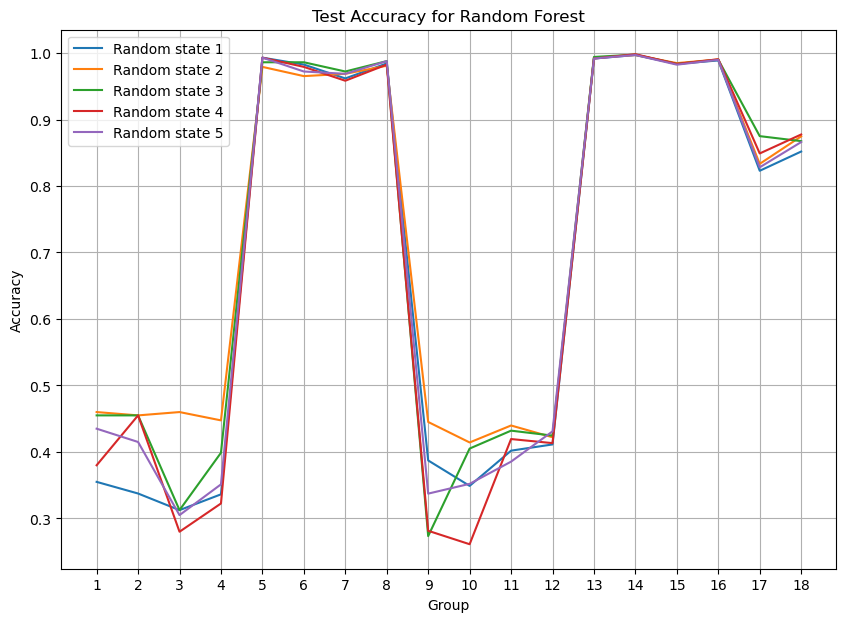

In [137]:
#Plot test accuracy
plt.figure(figsize=(10,7))
plt.plot(table_accuracy_rand['group'], table_accuracy_rand['Test Accuracy 1'], label='Random state 1')
plt.plot(table_accuracy_rand['group'], table_accuracy_rand['Test Accuracy 2'], label='Random state 2')
plt.plot(table_accuracy_rand['group'], table_accuracy_rand['Test Accuracy 3'], label='Random state 3')
plt.plot(table_accuracy_rand['group'], table_accuracy_rand['Test Accuracy 4'], label='Random state 4')
plt.plot(table_accuracy_rand['group'], table_accuracy_rand['Test Accuracy 5'], label='Random state 5')
plt.title('Test Accuracy for Random Forest')
plt.xlabel('Group')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 19, step=1))
plt.legend()
plt.grid()
plt.show()

In the plot with the different random states for the test accuracy it can be seen that these behave approximately the same independent of the random state. 

In the plot with the different random states for the test accuracy it can be seen that these behave approximately the same independent of the random state. 

It is interesting that with random state 2 the values which are low (groups which have independent test person) are higher than with the other random states, the other groups then look similar again. 

#### 2.3.1 Results

Here we will fit and evaluate the best and worst groups for the corresponding model.

In [151]:
#Get best and worst test accuracy
display("Highest test accuracy:", test_accuracy_table_gd[test_accuracy_table_gd['Test Accuracy'] == test_accuracy_table_gd['Test Accuracy'].max()])
display("Lowest test accuracy:", test_accuracy_table_gd[test_accuracy_table_gd['Test Accuracy'] == test_accuracy_table_gd['Test Accuracy'].min()])

'Highest test accuracy:'

Test Accuracy  group
13        0.99702     14

'Lowest test accuracy:'

Test Accuracy  group
2          0.305      3

The model performs best on test set when the group 14 has been trained and then tested. Although the GridSearch was performed with group 8.

The model performs worst with group 3. 

Now the models with the best and the worst group are trained and then the confusion matrixes are plotted.

In [243]:
display("Row with highest test accuracy:", test_accuracy_table_gd[test_accuracy_table_gd['group'] == 14])
display("Train accuracy for Group 14:" , train_accuracy_table_gd[train_accuracy_table_gd['group'] == 14])

'Row with highest test accuracy:'

Test Accuracy  group
13        0.99702     14

'Train accuracy for Group 14:'

Train Accuracy  group
13         0.99912     14

For the group which has the best test accuracy, the train accuracy was also output.

In [152]:
rdf_cm =  RandomForestClassifier(bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, random_state=42)

In [153]:
unique_labels = np.unique(y_14_train_false)
print(unique_labels)

[0. 1. 2. 3. 4. 5.]


As defined in the preprocessing file, the encoded lables correspond to the following activities: ('Laufen', 0), ('Rennen', 1), ('Sitzen', 2), ('Stehen', 3), ('Treppenlaufen', 4) and ('Velofahren', 5).

So the labels are stored with the respective activity so that it can be better tracked in the confusion matrix.

In [156]:
unique_labels = ['Laufen', 'Rennen', 'Sitzen', 'Stehen', 'Treppenlaufen', 'Velofahren']

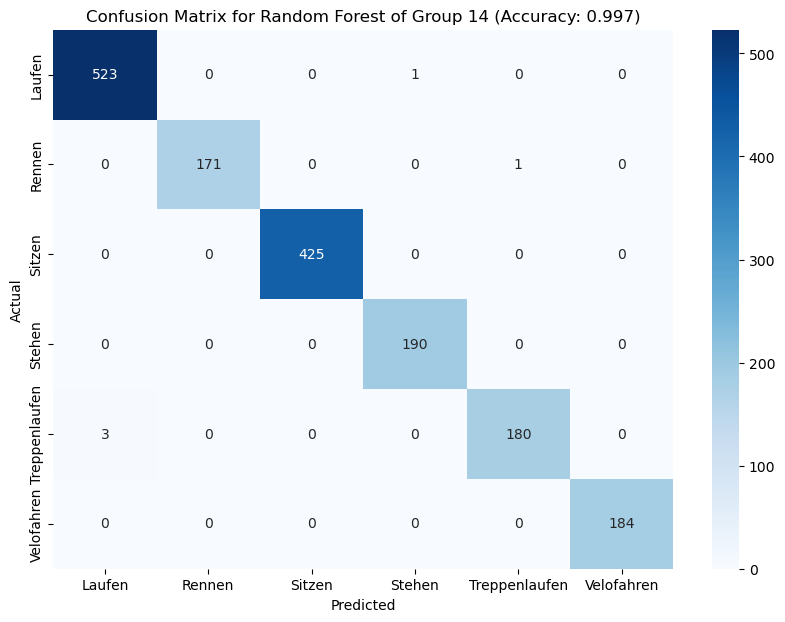

In [245]:
rdf_cm.fit(X_14_train_false, y_14_train_false)
y_pred_14 = rdf_cm.predict(X_14_test_false)
accuracy_14 = accuracy_score(y_14_test_false, y_pred_14)
cm_14 = confusion_matrix(y_14_test_false, y_pred_14)
df_cm_14 = pd.DataFrame(cm_14, index=unique_labels, columns=unique_labels)
plt.figure(figsize=(10,7))
sns.heatmap(df_cm_14, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Random Forest of Group 14 (Accuracy: '+str(np.round(accuracy_14, 3))+')')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The Confusion Matrix shows that the predictions of the model are very good, few activities are predicted incorrectly.

The diagonal distribution of the predictions shows an optimal distribution in the confusion matrix.  

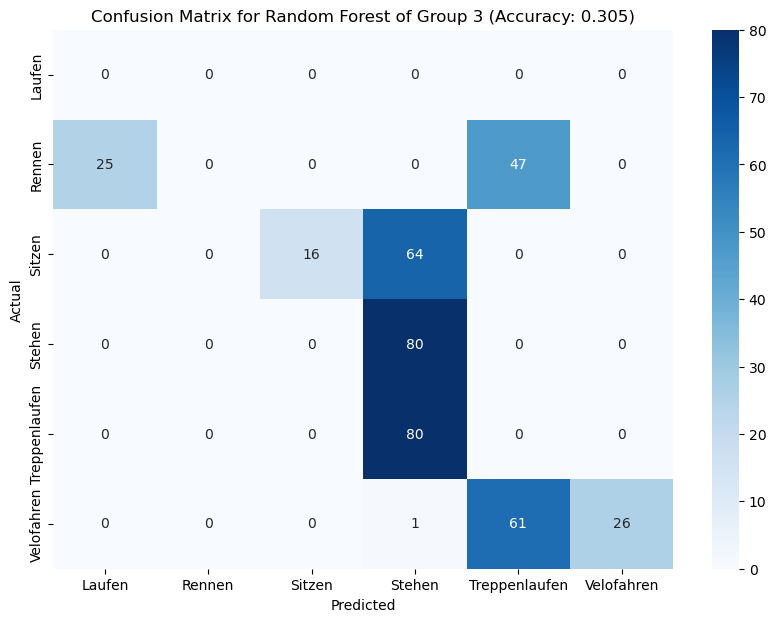

In [168]:
rdf_cm.fit(X_3_train_false, y_3_train_false)
y_pred_3 = rdf_cm.predict(X_3_test_false)
accuracy_3 = accuracy_score(y_3_test_false, y_pred_3)
cm_3 = confusion_matrix(y_3_test_false, y_pred_3)
df_cm_3 = pd.DataFrame(cm_3, index=unique_labels, columns=unique_labels)
plt.figure(figsize=(10,7))
sns.heatmap(df_cm_3, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Random Forest of Group 3 (Accuracy: '+str(np.round(accuracy_3, 3))+')')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In the confusion matrix of group 3, it can be seen that the model incorrectly predicts many activities. One reason could be that the model has difficulty classifying the unknown test user because it has too little data. It is also noticeable that the test user did not record the activity Laufen and does not predict it.  

Also interesting is that standing is often predicted, although it is an activity that has little variation in the measurements as can be seen in the Data Understanding file.

In addition to the best and worst group, groups 17 and 18 will be shown in a confusion matrix. 

These two groups have one more user who has recorded all activities. This new user was used as a test user.   

In [169]:
rdf_cm.fit(X_17_train_false, y_17_train_false)
y_pred_17 = rdf_cm.predict(X_17_test_false)
accuracy_17 = accuracy_score(y_17_test_false, y_pred_17)
cm_17 = confusion_matrix(y_17_test_false, y_pred_17)
df_cm_17 = pd.DataFrame(cm_17, index=unique_labels, columns=unique_labels)
plt.figure(figsize=(10,7))
sns.heatmap(df_cm_17, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Random Forest of Group 17 (Accuracy: '+str(np.round(accuracy_17, 3))+')')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The distribution of predictions in group 17 is good. With an accuracy of 0.865, the predictions of the activities are quite good. The Confusion Matrix shows that the predictions are distributed diagonally with some exceptions where a wrong prediction was made by the model.

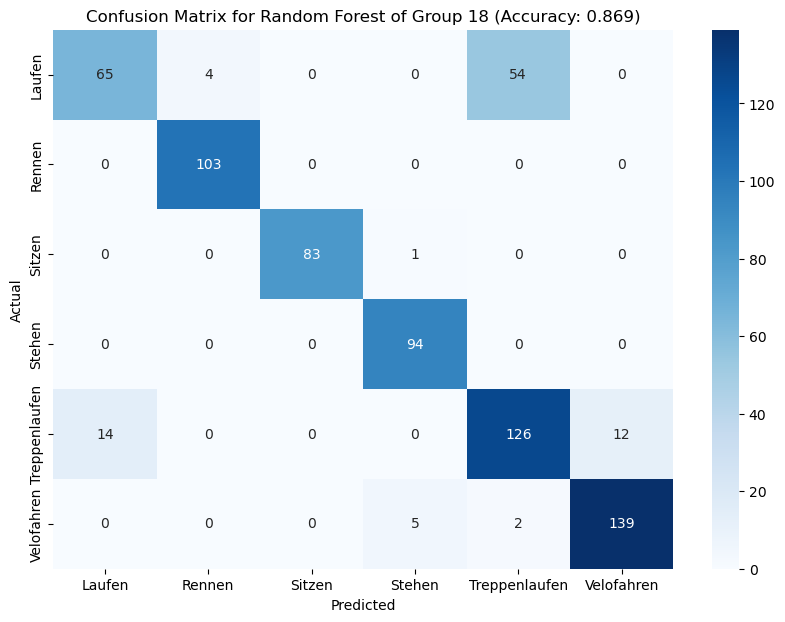

In [247]:
rdf_cm.fit(X_18_train_false, y_18_train_false)
y_pred_18 = rdf_cm.predict(X_18_test_false)
accuracy_18 = accuracy_score(y_18_test_false, y_pred_18)
cm_18 = confusion_matrix(y_18_test_false, y_pred_18)
df_cm_18 = pd.DataFrame(cm_18, index=unique_labels, columns=unique_labels)
plt.figure(figsize=(10,7))
sns.heatmap(df_cm_18, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Random Forest of Group 18 (Accuracy: '+str(np.round(accuracy_18, 3))+')')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The confusion matrix of group 18 looks similar to that of group 17. The accuracy is minimally better 0.869 instead of 0.865. The distribution of predictions on the confusion matrix are diagonal and like group 17 there are a few wrong predictions.

### 2.4 Summary Random Forest

The model performs much better when the data of all users are mixed instead when one user alone is in the testset. 

The best classification with the Random Forest model is obtained for group 14 with a test accuracy of 0.99, which has a training dataset where the users are also in the test dataset and the windows are 4 seconds long with 50% overlap and as many windows as possible. This model needs 1.15 seconds to fit the train data and 0.032 seconds to predict the test data. 

The worst classification is that of group 3, with a test accuracy of 0.3, which has an unknown test user and the data are divided into 2 second windows with no overlap and with fixed 8 windows per measurement. This model needs 0.256 seconds to fit the train data and 0.012 seconds to predict the test data. 

The classifications of groups 17 and 18, which have an additional user and this was taken as the test user, also perform very well with a test accuracy of 0.86. The model need to fit the data of group 17 0.362 seconds and ti predict the data of group 17  0.011 seconds. For group 18 the fitting of the model takes 3.118 seconds and the prediction takes 0.014 seconds.


The following conclusions can be drawn from the classification using the Random Forest:

- The model performs best when the test users are also preserved in the training data.

- The model performs at different speeds, the more data available in the training, the longer the fitting takes.

- The model needs 4 seconds windows for the best performance whereas the difference between the accuracies of group 13 which has 2 seconds windows and group 14 which has 4 seconds windows is very small.



## 3. SVC Support Vector Classification

SVC searches for a hyperplane that divides the data points of the different classes with the largest possible margin.

SVC explained in more detail works as follows. Data is entered which must be labeled. Then a hyperplane is defined randomly. Then the margin between the hyperplane and the next data point of each class is calculated, this margin is called the support vector.  The goal of SVC is to find a hyperplane that reduces the cost of misclassification while maximizing the margin.

In [172]:
from sklearn.svm import SVC

In [173]:
#Get SVC default parameters
svc = SVC()
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

All default parameters were printed.

### 3.1 Check of Datasets

To check which datasets perform better on a default model, the function of check_accuracy is changed to use the SVC default model. 

Afterwards the mean values are compared and the dataset which performs better is taken.

In [214]:
svc = SVC(C= 1.0, break_ties= False, cache_size= 200, class_weight= None, coef0= 0.0, decision_function_shape='ovo', degree= 3,
          gamma= 'scale', kernel= 'rbf', max_iter= -1, probability= False, random_state= None, shrinking= True, tol= 0.001, verbose= False)


def check_accuracy_svc(features):
    '''
    This function takes in a list of features and returns the mean accuracy of the training and test sets
        
    '''
    accuracy_test = []
    accuracy_train = []
    for feature in features:
        svc.fit(feature[0], feature[2])
        pred_train = svc.predict(feature[0])
        pred_test = svc.predict(feature[1])
        accuracy_train.append(accuracy_score(feature[2], pred_train))
        accuracy_test.append(accuracy_score(feature[3], pred_test))
    return np.mean(accuracy_train), np.mean(accuracy_test)

The same two list will be used as for the check of the performance of the random forest.

In [215]:
axes_calculated = check_accuracy_svc(all_features)
axes_not_calculated = check_accuracy_svc(not_all_features)

In [216]:
print("Train accuracy with axis callculated together for all sensors: ", axes_calculated[0])
print("Test accuracy with axis callculated together for all sensors: ", axes_calculated[1])

Train accuracy with axis callculated together for all sensors:  0.9692984975850093
Test accuracy with axis callculated together for all sensors:  0.6120573992243753


In [217]:
print("Train accuracy with axis not callculated together for all sensors: ", axes_not_calculated[0])
print("Test accuracy with axis not callculated together for all sensors: ", axes_not_calculated[1])

Train accuracy with axis not callculated together for all sensors:  0.9757671317999088
Test accuracy with axis not callculated together for all sensors:  0.6276466743699801


As can be seen in the accuracies of the different data sets, for the svc model the data are better suited which do not have the axes of the sensors calculated together. Compared to the random forest, the difference between the accuracies of the two data sets is very small.

For the further procedure we will use the data which did not calculate the axes together.

A function will be created which does the same as the function forest() but it will be used for svc.

In [218]:
svc = SVC(C= 1.0, break_ties= False, cache_size= 200, class_weight= None, coef0= 0.0, decision_function_shape='ovo', degree= 3,
          gamma= 'scale', kernel= 'rbf', max_iter= -1, probability= False, random_state= None, shrinking= True, tol= 0.001, verbose= False)

train_accuracy_svc, test_accuracy_svc = get_scores(not_all_features, svc)

Group  1
Train accuracy: 96.51%
Test accuracy: 28.50%
Time to train:  0.017 seconds
Time to test:  0.003 seconds
Group  2
Train accuracy: 96.37%
Test accuracy: 35.50%
Time to train:  0.038 seconds
Time to test:  0.023 seconds
Group  3
Train accuracy: 95.36%
Test accuracy: 26.75%
Time to train:  0.025 seconds
Time to test:  0.082 seconds
Group  4
Train accuracy: 97.48%
Test accuracy: 25.62%
Time to train:  0.077 seconds
Time to test:  0.11 seconds
Group  5
Train accuracy: 94.64%
Test accuracy: 90.97%
Time to train:  0.024 seconds
Time to test:  0.014 seconds
Group  6
Train accuracy: 95.69%
Test accuracy: 94.44%
Time to train:  0.031 seconds
Time to test:  0.016 seconds
Group  7
Train accuracy: 96.91%
Test accuracy: 92.36%
Time to train:  0.03 seconds
Time to test:  0.021 seconds
Group  8
Train accuracy: 97.47%
Test accuracy: 95.31%
Time to train:  0.052 seconds
Time to test:  0.062 seconds
Group  9
Train accuracy: 98.61%
Test accuracy: 24.55%
Time to train:  0.236 seconds
Time to test: 

In [219]:
# Train and test accuracy to dataframe
train_accuracy_table_svc = pd.DataFrame(train_accuracy_svc)
train_accuracy_table_svc.columns = ['Train Accuracy']
train_accuracy_table_svc['group'] = train_accuracy_table_svc.index + 1
test_accuracy_table_svc = pd.DataFrame(test_accuracy_svc)
test_accuracy_table_svc.columns = ['Test Accuracy']
test_accuracy_table_svc['group'] = test_accuracy_table_svc.index + 1

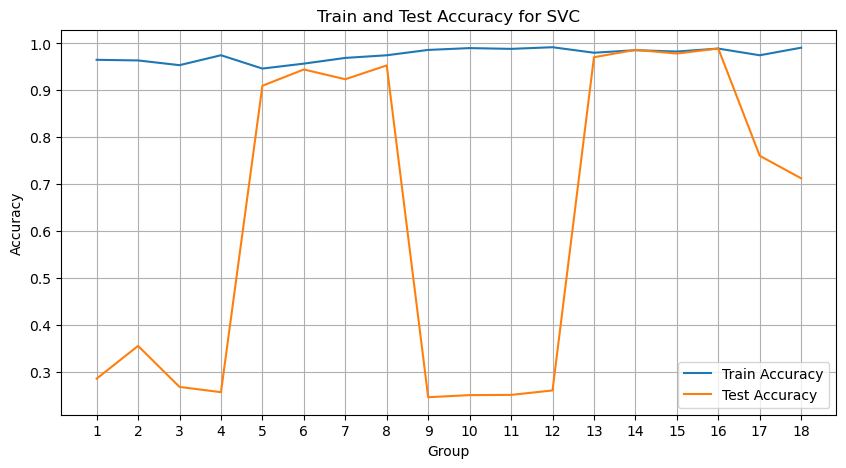

In [220]:
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy_table_svc['group'], train_accuracy_table_svc['Train Accuracy'], label='Train Accuracy')
plt.plot(test_accuracy_table_svc['group'], test_accuracy_table_svc['Test Accuracy'], label='Test Accuracy')
plt.title('Train and Test Accuracy for SVC')
plt.xlabel('Group')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 19, step=1))
plt.legend()
plt.grid()
plt.show()

The test accuracy curve of SVC looks very similar to the test accuracy curve of random forest. It is also noticeable that the groups which have an independent test user perform significantly worse than the groups in which the test and training data consist of mixed measurements of the users.

Groups 17 and 18 perform relatively well compared to the other groups with an independent test user, despite having an independent test user.

The training accuracy is linear even before GridSearch, which was not the case with random forest.  

### 3.2 GridSearch SVC

A GridSearch will be performed on the svc model. For this purpose, group 6 is used, since it has a lower train accuracy value in the plot and the difference between the test and train accuracy is not so large.

In [221]:
param_grid_svc = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid'], 'decision_function_shape':['ovo']}

grid_search_svc = GridSearchCV(estimator = svc, param_grid = param_grid_svc,
                            cv = 3, n_jobs = -1, verbose = 2, return_train_score=True, scoring='accuracy')       
grid_search_svc.fit(X_6_train_false, y_6_train_false)
grid_search_svc.best_params_
best_grid_svc = grid_search_svc.best_estimator_

Fitting 3 folds for each of 48 candidates, totalling 144 fits


The parameters of the GridSearch mean:

- C is a regularization parameter. The regularization is l2 squared

- gamma is the kernel coefficient which is only used for 'rbf', 'poly' and 'sigmoid'.

- Kernel defines the kernel type used in the model.

- decision_function_shape defines that the classification is one vs. one

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.fit

In [222]:
print(grid_search_svc.best_params_)
print(grid_search_svc.best_estimator_)
print(grid_search_svc.best_score_)

{'C': 100, 'decision_function_shape': 'ovo', 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
0.9959349593495935


In [223]:
svc_gd = SVC(C= 100, gamma= 0.01, kernel= 'rbf',break_ties= False, cache_size= 200, class_weight= None, coef0= 0.0, decision_function_shape='ovo', degree= 3,
             max_iter= -1, probability= False, random_state= None, shrinking= True, tol= 0.001, verbose= False)

train_accuracy_svc_gd, test_accuracy_svc_gd = get_scores(not_all_features, svc_gd)

Group  1
Train accuracy: 100.00%
Test accuracy: 37.00%
Time to train:  0.01 seconds
Time to test:  0.008 seconds
Group  2
Train accuracy: 100.00%


Test accuracy: 45.50%
Time to train:  0.04 seconds
Time to test:  0.018 seconds
Group  3
Train accuracy: 100.00%
Test accuracy: 36.75%
Time to train:  0.026 seconds
Time to test:  0.015 seconds
Group  4
Train accuracy: 99.93%
Test accuracy: 33.62%
Time to train:  0.048 seconds
Time to test:  0.023 seconds
Group  5
Train accuracy: 100.00%
Test accuracy: 96.53%
Time to train:  0.005 seconds
Time to test:  0.002 seconds
Group  6
Train accuracy: 100.00%
Test accuracy: 98.96%
Time to train:  0.016 seconds
Time to test:  0.008 seconds
Group  7
Train accuracy: 100.00%
Test accuracy: 97.22%
Time to train:  0.014 seconds
Time to test:  0.006 seconds
Group  8
Train accuracy: 100.00%
Test accuracy: 98.26%
Time to train:  0.03 seconds
Time to test:  0.019 seconds
Group  9
Train accuracy: 99.99%
Test accuracy: 26.75%
Time to train:  0.102 seconds
Time to test:  0.021 seconds
Group  10
Train accuracy: 100.00%
Test accuracy: 28.57%
Time to train:  0.26 seconds
Time to test:  0.051 seconds
Group  11
T

In [224]:
# Train and test accuracy to dataframe
train_accuracy_table_svc_gd = pd.DataFrame(train_accuracy_svc_gd)
train_accuracy_table_svc_gd.columns = ['Train Accuracy']
train_accuracy_table_svc_gd['group'] = train_accuracy_table_svc_gd.index + 1
test_accuracy_table_svc_gd = pd.DataFrame(test_accuracy_svc_gd)
test_accuracy_table_svc_gd.columns = ['Test Accuracy']
test_accuracy_table_svc_gd['group'] = test_accuracy_table_svc_gd.index + 1

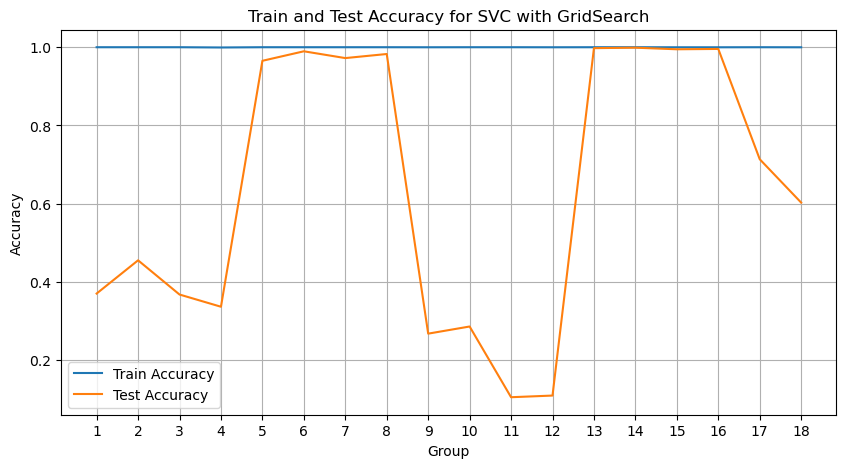

In [225]:
# Plot train and test accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy_table_svc_gd['group'], train_accuracy_table_svc_gd['Train Accuracy'], label='Train Accuracy')
plt.plot(test_accuracy_table_svc_gd['group'], test_accuracy_table_svc_gd['Test Accuracy'], label='Test Accuracy')
plt.title('Train and Test Accuracy for SVC with GridSearch')
plt.xlabel('Group')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 19, step=1))
plt.legend()
plt.grid()
plt.show()

A clear overfitting can be seen in the data. Test accuracies of the groups which have independent test users have decreased despite increasing training data. 

Accuracies have improved which were already very good before GridSearch. 

A GridSearch will be performed again but now with group 17 to see if there is an improvement.

In [226]:
param_grid_svc_17 = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

grid_search_svc_17 = GridSearchCV(estimator = svc, param_grid = param_grid_svc,
                            cv = 3, n_jobs = -1, verbose = 2, return_train_score=True, scoring='accuracy')       
grid_search_svc_17.fit(X_17_train_false, y_17_train_false)
grid_search_svc_17.best_params_
best_grid_svc = grid_search_svc_17.best_estimator_

Fitting 3 folds for each of 48 candidates, totalling 144 fits


In [227]:
print(grid_search_svc_17.best_params_)
print(grid_search_svc_17.best_estimator_)
print(grid_search_svc_17.best_score_)

{'C': 10, 'decision_function_shape': 'ovo', 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
0.9974747474747474


In [231]:
svc_gd_17 = SVC(C= 10, gamma= 0.1, kernel= 'rbf',break_ties= False, cache_size= 200, class_weight= None, coef0= 0.0, decision_function_shape='ovo', degree= 3,
             max_iter= -1, probability= False, random_state= None, shrinking= True, tol= 0.001, verbose= False)

train_accuracy_svc_gd_17, test_accuracy_svc_gd_17 = get_scores(not_all_features, svc_gd_17)

Group  1
Train accuracy: 100.00%
Test accuracy: 46.00%
Time to train:  0.017 seconds
Time to test:  0.007 seconds
Group  2
Train accuracy: 100.00%
Test accuracy: 46.00%
Time to train:  0.047 seconds
Time to test:  0.024 seconds
Group  3
Train accuracy: 100.00%
Test accuracy: 46.00%
Time to train:  0.051 seconds
Time to test:  0.021 seconds
Group  4
Train accuracy: 100.00%
Test accuracy: 46.00%
Time to train:  0.102 seconds
Time to test:  0.046 seconds
Group  5
Train accuracy: 100.00%
Test accuracy: 96.53%
Time to train:  0.015 seconds
Time to test:  0.004 seconds
Group  6
Train accuracy: 100.00%
Test accuracy: 98.26%
Time to train:  0.03 seconds
Time to test:  0.013 seconds
Group  7
Train accuracy: 100.00%
Test accuracy: 96.88%
Time to train:  0.03 seconds
Time to test:  0.012 seconds
Group  8
Train accuracy: 100.00%
Test accuracy: 98.96%
Time to train:  0.086 seconds
Time to test:  0.036 seconds
Group  9
Train accuracy: 100.00%
Test accuracy: 32.73%
Time to train:  0.354 seconds
Time 

In [232]:
# Train and test accuracy to dataframe
train_accuracy_table_svc_gd_17 = pd.DataFrame(train_accuracy_svc_gd_17)
train_accuracy_table_svc_gd_17.columns = ['Train Accuracy']
train_accuracy_table_svc_gd_17['group'] = train_accuracy_table_svc_gd_17.index + 1
test_accuracy_table_svc_gd_17 = pd.DataFrame(test_accuracy_svc_gd_17)
test_accuracy_table_svc_gd_17.columns = ['Test Accuracy']
test_accuracy_table_svc_gd_17['group'] = test_accuracy_table_svc_gd_17.index + 1

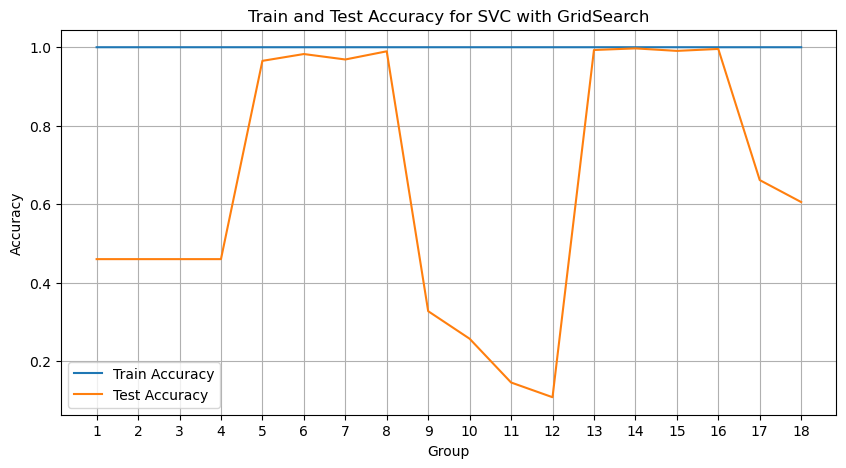

In [233]:
# Plot train and test accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy_table_svc_gd_17['group'], train_accuracy_table_svc_gd_17['Train Accuracy'], label='Train Accuracy')
plt.plot(test_accuracy_table_svc_gd_17['group'], test_accuracy_table_svc_gd_17['Test Accuracy'], label='Test Accuracy')
plt.title('Train and Test Accuracy for SVC with GridSearch')
plt.xlabel('Group')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 19, step=1))
plt.legend()
plt.grid()
plt.show()

After GridSearch with group 17, all groups were trained and evaluated on the adapted model. An improvement of the Accuracies can be seen in the groups 1-4 which have slightly increased compared to the previous model. 

Otherwise, no improvement can be seen.

#### 3.2.1 Results

In this section we will fit and evaluate the best and worst group on the SVC model

In [234]:
#Get best and worst test accuracy
display("Highest test accuracy:", test_accuracy_table_svc_gd[test_accuracy_table_svc_gd['Test Accuracy'] == test_accuracy_table_svc_gd['Test Accuracy'].max()])
display("Lowest test accuracy:", test_accuracy_table_svc_gd[test_accuracy_table_svc_gd['Test Accuracy'] == test_accuracy_table_svc_gd['Test Accuracy'].min()])

'Highest test accuracy:'

Test Accuracy  group
13       0.998808     14

'Lowest test accuracy:'

Test Accuracy  group
10       0.104854     11

The model performs best when the group 14 has been trained and then tested. Although the GridSearch was performed with group 6.

The model performs worst with group 11. 

Now the models with the best and the worst group are trained and then the confusion matrixes are plotted.

In [235]:
svc_cm = SVC(C= 10, gamma= 0.1, kernel= 'rbf',break_ties= False, cache_size= 200, class_weight= None, coef0= 0.0, decision_function_shape='ovo', degree= 3,
             max_iter= -1, probability= False, random_state= None, shrinking= True, tol= 0.001, verbose= False)

In [236]:
svc_cm.fit(X_14_train_false, y_14_train_false)
y_pred_14_svc = svc_cm.predict(X_14_test_false)
accuracy_14_svc = accuracy_score(y_14_test_false, y_pred_14_svc)
cm_14_svc = confusion_matrix(y_14_test_false, y_pred_14_svc)
df_cm_14_svc = pd.DataFrame(cm_14_svc, index=unique_labels, columns=unique_labels)
plt.figure(figsize=(10,7))
sns.heatmap(df_cm_14_svc, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for SVC of Group 14 (Accuracy: '+str(np.round(accuracy_14_svc, 3))+')')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

An optimal diagonal distribution of predictions in the Confusion Matrix can be seen. The model performs with an accuracy of 0.99.

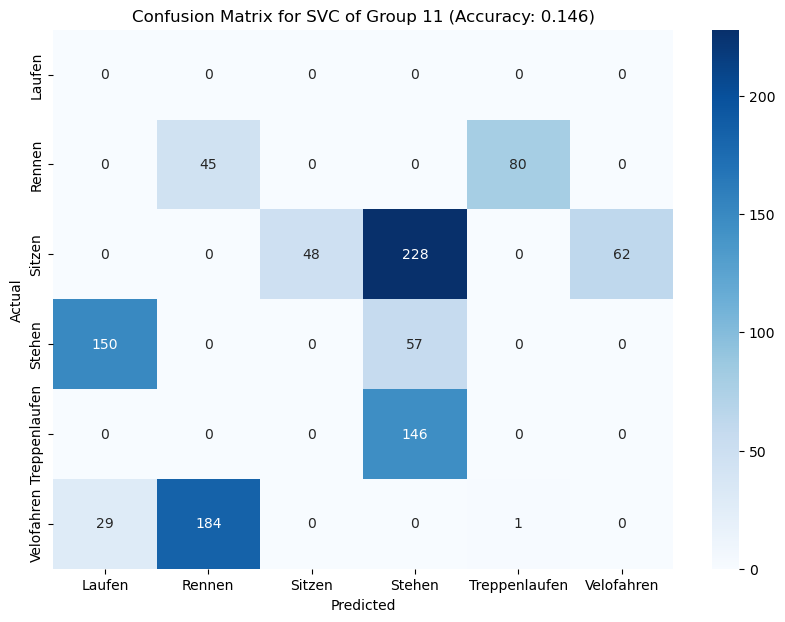

In [238]:
svc_cm.fit(X_11_train_false, y_11_train_false)
y_pred_11_svc = svc_cm.predict(X_11_test_false)
accuracy_11_svc = accuracy_score(y_11_test_false, y_pred_11_svc)
cm_11_svc = confusion_matrix(y_11_test_false, y_pred_11_svc)
df_cm_11_svc = pd.DataFrame(cm_11_svc, index=unique_labels, columns=unique_labels)
plt.figure(figsize=(10,7))
sns.heatmap(df_cm_11_svc, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for SVC of Group 11 (Accuracy: '+str(np.round(accuracy_11_svc, 3))+')')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

For group 11, there are many false predictions, which also confirms the accuracy of 0.14. 

It is striking that Velofahren is always predicted incorrectly. 

In addition to the best and worst group, groups 17 and 18 will be shown in a confusion matrix. 

These two groups have one more user who has recorded all activities. This new user was used as a test user.   

In [239]:
svc_cm.fit(X_17_train_false, y_17_train_false)
y_pred_17_svc = svc_cm.predict(X_17_test_false)
accuracy_17_svc = accuracy_score(y_17_test_false, y_pred_17_svc)
cm_17_svc = confusion_matrix(y_17_test_false, y_pred_17_svc)
df_cm_17_svc = pd.DataFrame(cm_17_svc, index=unique_labels, columns=unique_labels)
plt.figure(figsize=(10,7))
sns.heatmap(df_cm_17_svc, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for SVC of Group 17 (Accuracy: '+str(np.round(accuracy_17_svc, 3))+')')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In the confusion matrix of group 17, a slight diagonal distribution can be seen, but there are some misclassifications as can be seen in the confusion matrix.

Compared to the random forest model, the SVC performs slightly worse ~0.2 on this group.

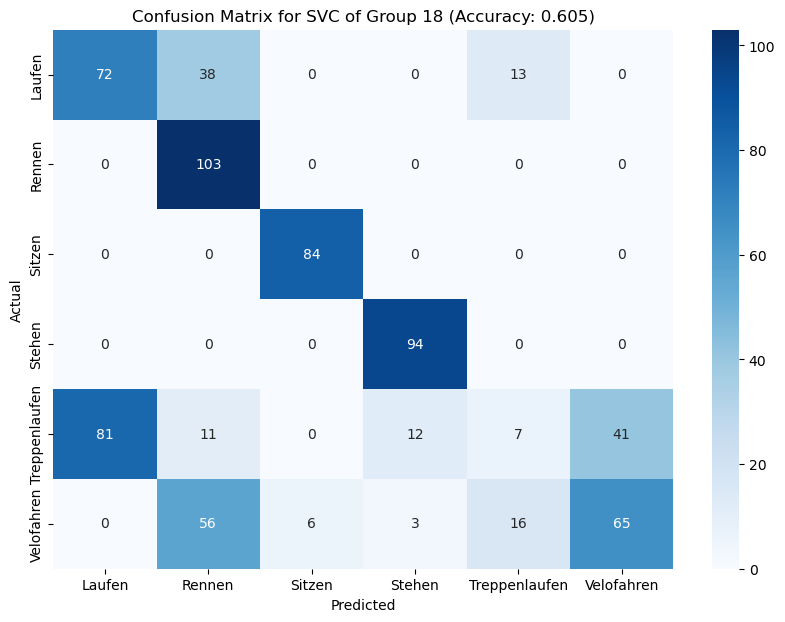

In [240]:
svc_cm.fit(X_18_train_false, y_18_train_false)
y_pred_18_svc = svc_cm.predict(X_18_test_false)
accuracy_18_svc = accuracy_score(y_18_test_false, y_pred_18_svc)
cm_18_svc = confusion_matrix(y_18_test_false, y_pred_18_svc)
df_cm_18_svc = pd.DataFrame(cm_18_svc, index=unique_labels, columns=unique_labels)
plt.figure(figsize=(10,7))
sns.heatmap(df_cm_18_svc, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for SVC of Group 18 (Accuracy: '+str(np.round(accuracy_18_svc, 3))+')')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

As in the confusion matrix of group 17, a diagonal distribution can be seen but with some false predictions. 

In comparison, the SVC also performs worse with ~0.2 in accuracy than the random forest model.

### 3.3 Summary SVC


The SVC model performs much better on the groups that have users in both the test and training datasets. 

A significant overfitting is observed with the SVC model as the training performance increases and the test performance decreases for the datasets with independent test users.

The best classification with the SVC model is obtained for group 14 with a test accuracy of 0.99. The group has a training dataset where the users are also included in the test dataset and the windows are 4 seconds long, with 50% overlap and as many windows as possible. This model takes 0.76 seconds to fit the training data and 0.22 seconds to predict the test data.

The worst classification is that of group 11 which achieves an accuracy of 0.14 which is very low. Group 11 consists of as many 2 second windows as possible without overlap and with an independent test user. The model fits the data in 0.964 seconds and predicts it in 0.178 seconds.

We can draw the following results from the classification using SVC.

- The model performs very well on groups that have all users in the test and training data.

- The model overfits.

- The model performs better on data with a longer window (4 seconds). However, the difference in performance between the same conditions of the data (overlap, test users and number of windows) with different length (2 or 4 seconds) of the windows is minimal.

## 4. Conclusion


If you compare the two models SVC and Random Forest, you can see that the best group 14 performs the same for both models. However, for the remaining groups Random Forest performs better than SVC, as an example one can take the groups 17 and 18 which achieve an accuracy of ~0.86 with Random Forest and ~0.6 with SVC. 

Therefore, the Random Forest model is better suited for our data.

The best Random Forest model includes the following parameters:

- Bootstrap = True
- max_depth=10
- max_features=2
- min_samples_leaf=3
- min_samples_split=8
- n_estimators=100

All the following results were achieved on this model.

The best performance for known test users has the group 14. This group consists of the following:
- 4 seconds window
- 50% overlap of windows
- as many windows as possible per recording

With this group we get the following results:

- Train accuracy: 0.99912
- Test accuracy: 0.99702
- Time to predict: 0.032 seconds

In summary, with this data group, this model can predict data with an accuracy of 0.99702 within 0.032 seconds when the data window is 4 seconds long.


The best performance for groups that had an unknown test user is group 18. This group consists of the following:

- 2 seconds window
- 50% overlap of windows
- As many windows as possible per recording
- A seventh unknown user representing the test set

With this group we get the following results:

- Train Accuracy: 0.9977
- Test accuracy: 0.8689
- Time to predict: 0.016 seconds

Even though in this group the new user is unknown, the results are very good.


Summarizing the chapter on non-Deep Learning, it can be said that measurements of users that occur both in the test and in the training data are better predicted. Groups that have an unknown user as a test set perform worse, but even there there are very large differences in performance. The groups that received a seventh user perform very well on the random forest with a test accuracy of 0.86 which is quite high.

For further use, the random forest would be better than the SVC because it has better performance and predicts the data faster. The length of the recordings for prediction should be optimal at 4 seconds, but at 2 seconds you would already get good results.